In [28]:
import pandas as pd 
import matplotlib.pyplot as plt

In [29]:
df = pd.read_excel("/content/Telco-Customer-Churn.xlsx")
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. Compare churn count with respect to gender


Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


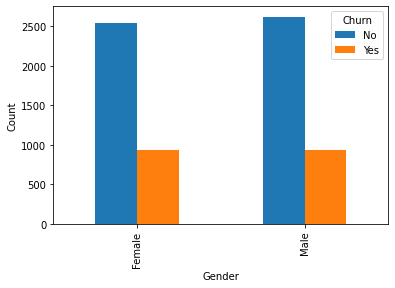

In [30]:
ctabresult = pd.crosstab(index=df['gender'],columns=df['Churn'])
print(ctabresult)

graph1 = ctabresult.plot.bar()
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

2. Find out how many female senior citizens there in the dataset

In [31]:
seniors = df[(df['SeniorCitizen']== 1)]
seniors_female = seniors[(seniors['gender'] == 'Female')]
seniorfemales_count = (seniors_female['gender']).count()
seniorfemales_count

568

3. Compare 'Tenure' with 'Total Charges'

Text(0, 0.5, 'Total Charges')

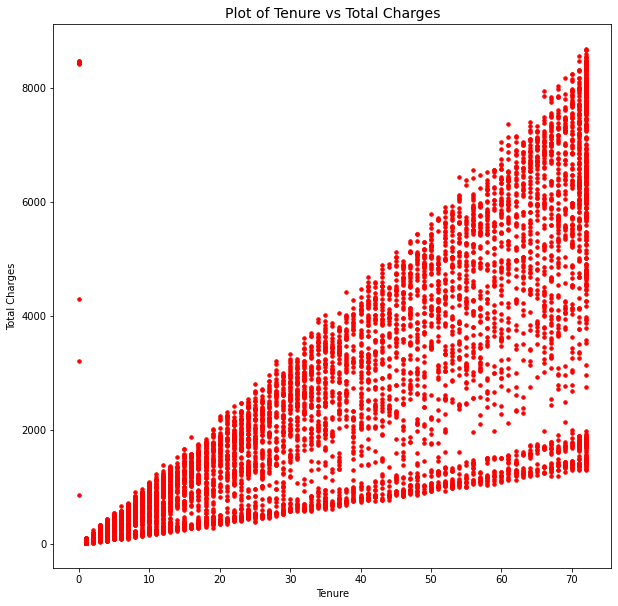

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(df['tenure'],df['TotalCharges'],s=12,color='red') 
plt.title('Plot of Tenure vs Total Charges',fontsize = 14) 
plt.xlabel('Tenure')  
plt.ylabel('Total Charges')

4. Find out which contract is preferred by the senior citizen

In [33]:
import seaborn as sns 

Text(0, 0.5, 'Count')

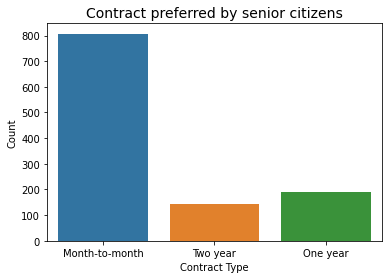

In [34]:
sns.countplot(x='Contract',data = seniors)
plt.title('Contract preferred by senior citizens',fontsize = 14) 
plt.xlabel('Contract Type') 
plt.ylabel('Count')

5. Comment on your finds on Payment Method?

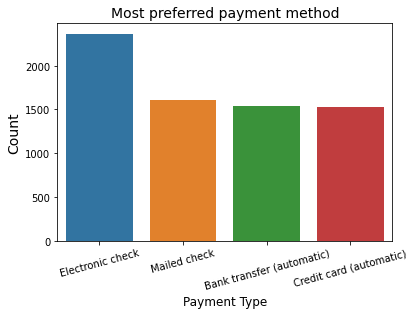

In [35]:
df['PaymentMethod'].unique() 
sns.countplot(x='PaymentMethod',data=df)
plt.xticks(rotation=15)
plt.title('Most preferred payment method',fontsize = 14) 
plt.xlabel('Payment Type',fontsize=12)
plt.ylabel('Count',fontsize=14)
plt.show()

In [36]:
# Electonic check is the most preferred payment method among the tested sample population, with the other three payment methods being alomost  
# equally popular among the rest.

5. Comment on your finds on Payment Method

In [37]:
ct= pd.crosstab(index= df['PaymentMethod'],columns= df['Churn'])
ct

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [38]:
# Electronic check has the highest churn rate 

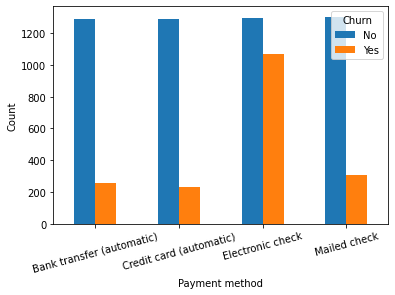

In [39]:
graph2 = ct.plot.bar()
plt.xticks(rotation=15)
plt.xlabel('Payment method')
plt.ylabel('Count')

plt.show()

In [40]:
# It is seen from the data that the churn rate is highest among customers using electronic check as their payment method, and lowest among those
# using credit card. The company needs to understand that their customers, who were using electronic check are moving away from it. There will be
# significant shift in the focus group, and thus their business strategies need to be revisited and modified. 